# Multilayer preceptrons (MLPs)

We studied the model which performs a feature transformation:
$$
f(\boldsymbol{x};\boldsymbol{\theta})=\textbf{W}\boldsymbol{\phi }(\boldsymbol{x})+\boldsymbol{b}
$$
Note that this is linear in the parameters $\boldsymbol{\theta}=(\textbf{W}, \boldsymbol{b})$. We can extend it by endowing the feqture extractor with its own parameters, $\boldsymbol{\theta}_2$, to get
$$
f(\boldsymbol{x};\boldsymbol{\theta})=\textbf{W}\boldsymbol{\phi }(\boldsymbol{x};\boldsymbol{\theta}_2)+\boldsymbol{b}
$$
where $\boldsymbol{\theta}=(\boldsymbol{\theta}_1, \boldsymbol{\theta}_2)$ and $\boldsymbol{\theta}_1=(\textbf{W}, \boldsymbol{b})$.

To create more and more complex functions, we can repeat this process recursively. Assume that we compose $L$ functions. Then we get
$$
f(\boldsymbol{x};\boldsymbol{\theta})=f_L(f_{L-1}(\cdots(f_1(\boldsymbol{x})) \cdots ))
$$
where $f_l(\boldsymbol{x})=f(\boldsymbol{x};\boldsymbol{\theta}_l)$ is the function at layer $l$. This idea is known as a **multilayer perceptron (MLP)**.

We will use the below diabetes prediction dataset, which is a collection of medical and demographic data from patients, along with their diabetes status.



In [ ]:
import csv
import pandas as pd

diabetes_df = pd.read_csv("https://drive.google.com/u/0/uc?id=1e8lN_FLgUpkEtQsmtIoAU6h5uYtEKXIm&export=download")
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
diabetes_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

To train the machine, we split dataset to input datas (	gender, age	hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level) and output datas(diabetes). In 'diabetes' column, 0 means 'no diabete' and 1 means 'have diabete'.

Also, for training, we have to transform string entries to appropriate number entries. I tranform

*   'Male' → 0
*   'Female' → 1
*   'Other'→ 2

in the 'gender' column and

*   'never' → 0
*   'ever', 1
*   'current', 2
*   'not current', 3
*   'former', 4
*   'No Info', 5

in the 'smoking_history' column.

I use 70% of dataset for training, and 30% for testing.



In [ ]:
import numpy as np
import time
import warnings
warnings.filterwarnings("ignore") #suppress warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#convert imput to numpy arrays
diabetes_df['gender'] = diabetes_df['gender'].replace('Male', 0)
diabetes_df['gender'] = diabetes_df['gender'].replace('Female', 1)
diabetes_df['gender'] = diabetes_df['gender'].replace('Other', 2)

diabetes_df['smoking_history'] = diabetes_df['smoking_history'].replace('never', 0)
diabetes_df['smoking_history'] = diabetes_df['smoking_history'].replace('ever', 1)
diabetes_df['smoking_history'] = diabetes_df['smoking_history'].replace('current', 2)
diabetes_df['smoking_history'] = diabetes_df['smoking_history'].replace('not current', 3)
diabetes_df['smoking_history'] = diabetes_df['smoking_history'].replace('former', 4)
diabetes_df['smoking_history'] = diabetes_df['smoking_history'].replace('No Info', 5)

diabetes_df.head()

X = diabetes_df.drop(columns=['heart_disease'])
y = diabetes_df['diabetes'].values.reshape(X.shape[0], 1)

#split data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=2)

#standardize the dataset
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

print(f"Shape of train set is {Xtrain.shape}")
print(f"Shape of test set is {Xtest.shape}")
print(f"Shape of train label is {ytrain.shape}")
print(f"Shape of test labels is {ytest.shape}")

Shape of train set is (70000, 8)
Shape of test set is (30000, 8)
Shape of train label is (70000, 1)
Shape of test labels is (30000, 1)


##MLP
A **perceptron** is a deterministic binary classifier of the following form:
$$
f(\boldsymbol{x}, \boldsymbol{\theta})=\mathbb{I}(\boldsymbol{w}^T\boldsymbol{x}_n+b \geq 0)=H(\boldsymbol{w}^T\boldsymbol{x}_n+b)
$$
Here, $H(a)$ is the **heavyside step function**. Since the decision boundaries represented by perceptrons are linear, there is a big limitation in what they can represent. We overcome this limitation by stacking multiple perceptrons on top of each other, which is called **multilayer perceptron (MLP)**.

###The XOR problem with MLP
Using a perceptron, we can represent AND, OR, NOT, etc as below:
$$
AND(\boldsymbol{x}, \boldsymbol{\theta})=AND(x_1, x_2, -1.5, 1, 1)=H(x_1+x_2-1.5)
$$
$$
OR(\boldsymbol{x}, \boldsymbol{\theta})=OR(x_1, x_2, -0.5, 1, 1)=H(x_1+x_2-0.5)
$$
$$
NOT(x, \boldsymbol{\theta})=OR(x, -0.5, -1)=H(-x-0.5)
$$
But we cannot represent XOR with single perceptron because it is not linearly serparable, as in below Figure.

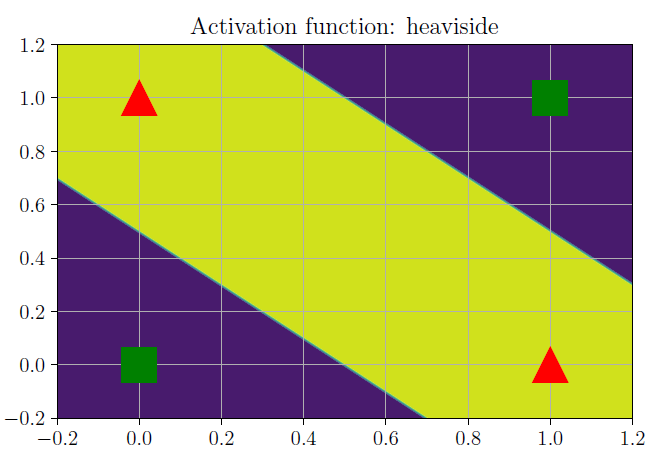

Hence, we will use the MLP to solve this problem. First, note that we can compute XOR function $f$ given input $x_1, x_2$ by
$$
y=f(x_1, x_2)= \overline{(x_1\wedge x_2)}\wedge (x_1\vee x_2)
$$
where $\overline{x}$ is the NOT operation, $\wedge$ is the AND operation, and $\vee$ is the OR operation. Therefore, we can use the MLP shown in the figure below.

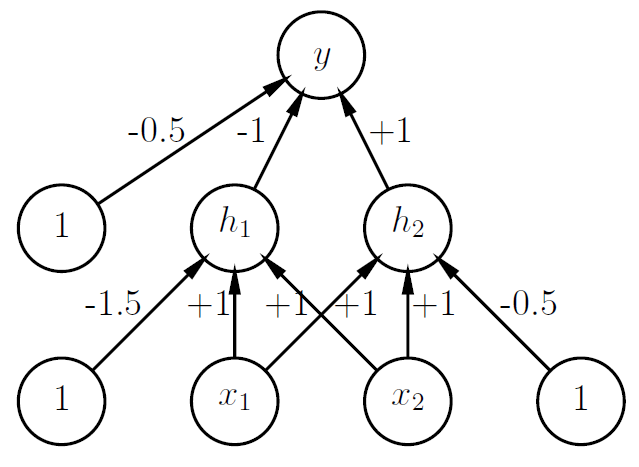

This MLP consists of 3 perceptrons, denoted $h_1, h_2$ and $y$. The note $x_1$ and $x_2$ are inputs. Here, the nodes $h_1$ and $h_2$ are called **hidden units**. We can generalize this example to show that an MLP can represent any logical functions.

##MLPs with Activation Functions
We discussed MLP which is defined as a stack of perceptrons, where each perceptron is involved Heaviside functions. But Heaviside function is non-differentiable, and this makes such models difficult to train. Hence, we will replace the Heaviside function $H:\mathbb{R}\to \left\{ 0,1 \right\}$ with a differentiable function $\varphi :\mathbb{R}\to \mathbb{R}$, which is called **activation function**. Actually, we define the hidden units at $\boldsymbol{z}_l$ as below:
$$
\boldsymbol{z}_l=f_l(\boldsymbol{z}_{l-1})=\varphi_l(\boldsymbol{b}_l + \textbf{W}_l\boldsymbol{z}_{l-1})
$$
Here, the quantity passed to the activation function is called the **pre-activations**:
$$
\boldsymbol{a}_l=\boldsymbol{b}_l + \textbf{W}_l\boldsymbol{z}_{l-1}
$$
so we can write $\boldsymbol{z}_l$ as below:
$$
\boldsymbol{z}_l=\varphi_l(\boldsymbol{a}_l)
$$

###Activation functions
We are free to use any kind of differentiable activation function at each layer, except a linear function. Otherwise, the whole model reduces to a regular linear model. Below functions are commonly used activation functions.

1.   sigmoid function
$$
\sigma (a)=\frac{1}{1+e^{-a}}
$$
2.   tanh function
$$
\mathrm{tanh}(a)=\frac{e^{a}-e^{-a}}{e^{a}+e^{-a}}
$$
3.   rectified linear unit (ReLU)
$$
\mathrm{ReLU}(a)=\mathrm{max}(a,0)=a\mathbb{I}(a>0)
$$



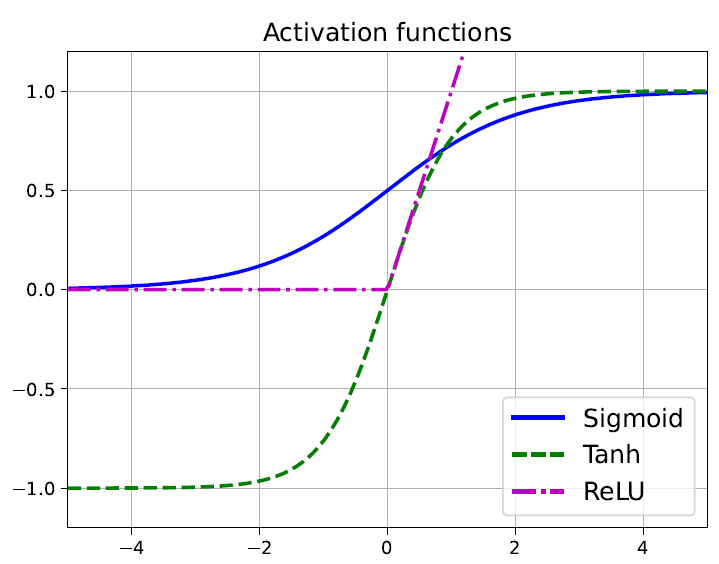

##Training Neural Networks
We want to fit DNNs to data. One apporach is using MLE, by minimizing the NLL:
$$
\mathcal{L}=-\mathrm{log} \ p(\mathcal{D} | \boldsymbol{\theta })=-\sum_{n=1}^{N}\mathrm{log} \ p(\boldsymbol{y}_n | \boldsymbol{x}_n; \boldsymbol{\theta })
$$
Then how we can minimize it? Just compute the gradient of this loss and pass it to an off-the-shelf optimizer, such as Gradient Descent, Adam, etc. Then how can we compute the gradient of this loss? We can use backpropagation algorithm to compute it.

###Backpropagation
**Backpropagation** is the algorithm for computing the gradient of a function efficiently. Consider a loss function for a MLP with L layers:
$$
\mathcal{L}((\boldsymbol{x}, \boldsymbol{y}), \boldsymbol{\theta }) = f(\boldsymbol{f}_L(\boldsymbol{f}_{L-1}(\cdots(\boldsymbol{f}_1(\boldsymbol{x})) \cdots )),\boldsymbol{y})
$$
where $\boldsymbol{x}$ is input, $\boldsymbol{y}$ is ground truth target, $\boldsymbol{f_l}(\boldsymbol{x})=\boldsymbol{f_l}(\boldsymbol{x};\boldsymbol{\theta}_l)$ is the function at layer $l$, and $f$ is any loss computing function. We can represent this as below:
$$
\mathcal{L}=f \circ \boldsymbol{f}_L \circ \boldsymbol{f}_{L-1} \circ \cdots \circ \boldsymbol{f}_{2} \circ \boldsymbol{f}_1
\\
\boldsymbol{x}_2 = \boldsymbol{f}_1(\boldsymbol{x}, \boldsymbol{\theta }_1)
\\
\boldsymbol{x}_3 = \boldsymbol{f}_2(\boldsymbol{x}_2, \boldsymbol{\theta }_2)
\\
\vdots
\\
\boldsymbol{x}_{L+1} = \boldsymbol{f}_L(\boldsymbol{x}_L, \boldsymbol{\theta }_L)
\\
\mathcal{L}=f(\boldsymbol{x}_{L+1}, \boldsymbol{y})
$$
To find the gradient wrt parameter $\boldsymbol{\theta}$, we can use the chain rule to get
$$
\frac{\partial \mathcal{L}}{\partial \boldsymbol{\theta }_{L}} = \frac{\partial \mathcal{L}}{\partial \boldsymbol{x}_{L+1}} \frac{\partial \boldsymbol{x}_{L+1}}{\partial \boldsymbol{\theta }_{L}}
\\
\frac{\partial \mathcal{L}}{\partial \boldsymbol{\theta }_{L-1}} = \frac{\partial \mathcal{L}}{\partial \boldsymbol{x}_{L+1}} \frac{\partial \boldsymbol{x}_{L+1}}{\partial \boldsymbol{x}_{L}} \frac{\partial \boldsymbol{x}_{L}}{\partial \boldsymbol{\theta }_{L-1}}
\\
\vdots
\\
\frac{\partial \mathcal{L}}{\partial \boldsymbol{\theta }_{1}} = \frac{\partial \mathcal{L}}{\partial \boldsymbol{x}_{L+1}} \frac{\partial \boldsymbol{x}_{L+1}}{\partial \boldsymbol{x}_{L}} \cdots \frac{\partial \boldsymbol{x}_{3}}{\partial \boldsymbol{x}_{2}} \frac{\partial \boldsymbol{x}_{2}}{\partial \boldsymbol{\theta }_{1}}
$$
Note that we can compute it recursively, so we can efficiently compute the gradient. Below figure is a simple representation of mlp with 4 layers.

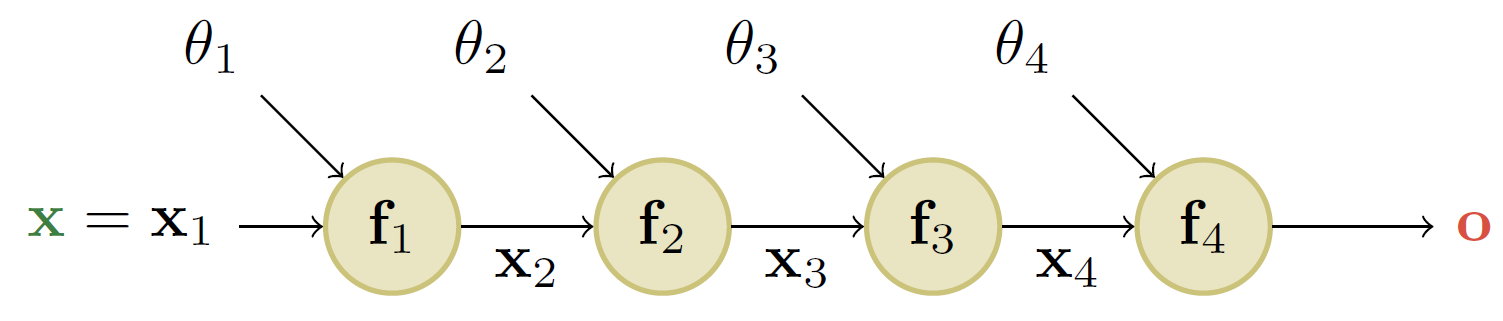

#Problems and Solutions in Training Neural Network

Below is my neural network model for training the diabetes prediction dataset. This is a two layer neural network, and i used sigmoid functions for each activation function. It takes gd(gradient discent) as an optimizer.

###Code for simple Neural Network

In [ ]:
class NeuralNet_simple():
      
  def __init__(self, layers=[8,2,1], learning_rate=0.001, iterations=100):
    self.params = {}
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.loss = []
    self.sample_size = None
    self.layers = layers
    self.X = None
    self.y = None

  # Initialize the weights
  def init_weights(self):
    np.random.seed(1) # Seed the random number generator
    self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
    self.params['b1']  =np.random.randn(1, self.layers[1])
    self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
    self.params['b2'] = np.random.randn(1, self.layers[2],)

  # for nonzero x
  def eta(self, x):
    ETA = 1e-10
    return np.maximum(x, ETA)

  # sigmoid function
  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))
  
  # derivative of sigmoid function wrt y
  def dSigmoid(self, y):
    return y * (1 - y)

  # loss function
  def entropy_loss(self, y, yhat):
    numb_of_samples = len(y)
    yhat_inv = 1.0 - yhat
    y_inv = 1.0 - y
    loss = -1/numb_of_samples * (
        np.sum(
            np.multiply(np.log(self.eta(yhat)), y) + np.multiply((y_inv), np.log(self.eta(yhat_inv)))
            )
        )
    return loss

  # perform a forward propagation
  def forward_propagation(self):
    
    Z1 = self.X.dot(self.params['W1']) + self.params['b1']
    A1 = self.sigmoid(Z1)
    Z2 = A1.dot(self.params['W2']) + self.params['b2']
    yhat = self.sigmoid(Z2)
    loss = self.entropy_loss(self.y,yhat)

    # save calculated values     
    self.params['Z1'] = Z1
    self.params['Z2'] = Z2
    self.params['A1'] = A1

    return yhat,loss

  # perform a barward propagation
  def back_propagation(self,yhat):
  
    # Computes the derivatives
    y_inv = 1 - self.y
    yhat_inv = 1 - yhat

    dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
    dyhat_wrt_dz2 = self.dSigmoid(yhat)
    dl_wrt_z2 = dl_wrt_yhat * dyhat_wrt_dz2

    dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
    dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
    dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

    dA1_wrt_dz1 = self.dSigmoid(self.params['A1'])
    dl_wrt_z1 = dl_wrt_A1 * dA1_wrt_dz1
    dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
    dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

    # update parameters using sgd
    self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
    self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
    self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
    self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2

  # train the model using data and labels 
  def fit(self, X, y):
    self.X = X
    self.y = y
    self.init_weights()

    for i in range(self.iterations):
      yhat, loss = self.forward_propagation()
      self.back_propagation(yhat)
      self.loss.append(loss)

  # predict the data with given input
  def predict(self, X):
    Z1 = X.dot(self.params['W1']) + self.params['b1']
    A1 = self.sigmoid(Z1)
    Z2 = A1.dot(self.params['W2']) + self.params['b2']
    pred = self.sigmoid(Z2)
    return np.round(pred) 

  # calculate the accuracy of the results compared with given data
  def acc(self, y, yhat):
    acc = int(sum(y == yhat) / len(y) * 100)
    return acc

  # plotting loss
  def plot_loss(self):
    plt.plot(self.loss)
    plt.xlabel("Iteration")
    plt.ylabel("logloss")
    plt.title("Loss curve for training")
    plt.show()  

##Learning Rate


When using SGD, we need to be careful in how we choose the learning rate in order to achieve convergence.

When we take a too small learning rate, the model may result in underfitting, have too slow learning speed, or have a likelihood of failing into local minima.

Below code shows the case of too small learning rate resulting in too slow learning speed. 

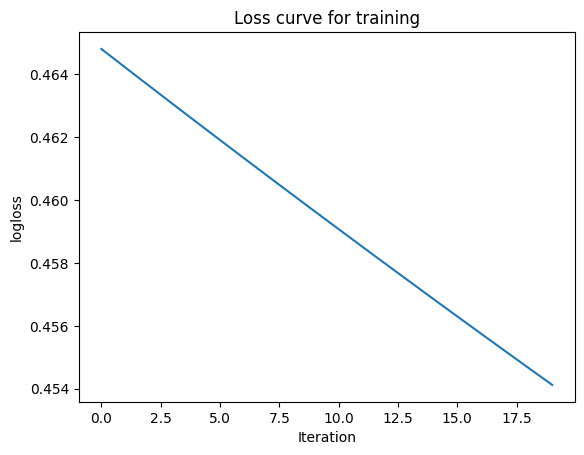

Train accuracy is 91
Test accuracy is 91


In [ ]:
nn = NeuralNet_simple(layers=[8,2,1], learning_rate=0.0000001, iterations=20) # create the NN model
nn.fit(Xtrain, ytrain) #train the model
nn.plot_loss()

train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))

When we take a too large learning rate, the model may result in instability, fixed loss, or diverge.

Below code shows the case of too lage learning rate resulting in fixed loss. 

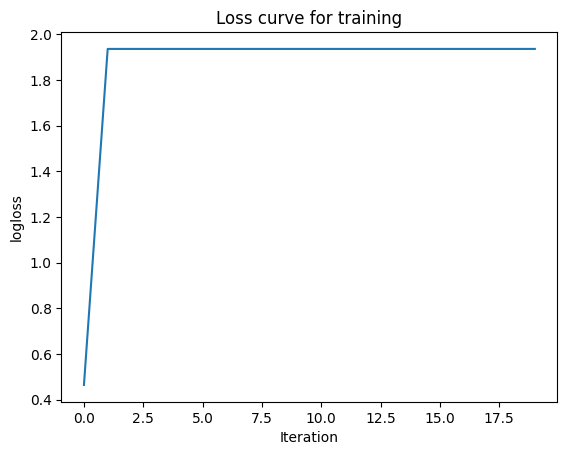

Train accuracy is 91
Test accuracy is 91


In [ ]:
nn = NeuralNet_simple(layers=[8,2,1], learning_rate=0.01, iterations=20) # create the NN model
nn.fit(Xtrain, ytrain) #train the model
nn.plot_loss()

train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))

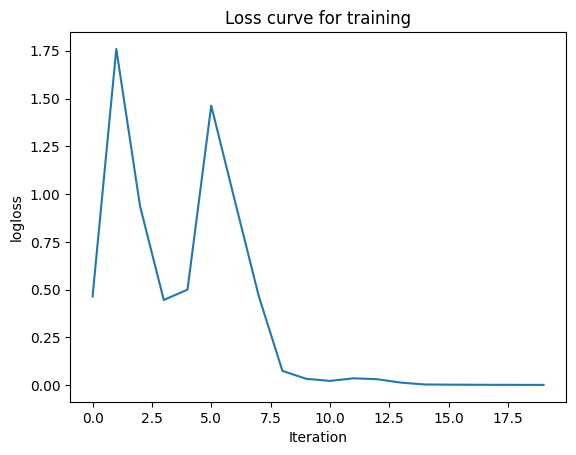

Train accuracy is 99
Test accuracy is 99


In [ ]:
nn = NeuralNet_simple(layers=[8,2,1], learning_rate=0.001, iterations=20) # create the NN model
nn.fit(Xtrain, ytrain) #train the model
nn.plot_loss()

train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))

##Vanishing gradients
When training deep models, the gradient tends to become either very small. Consider the gradient of the loss wrt a node at layer $l$:

$$
\frac{\partial \mathcal{L}}{\partial \boldsymbol{z}_{l}} = \frac{\partial \mathcal{L}}{\partial \boldsymbol{z}_{l+1}} \frac{\partial \boldsymbol{z}_{l+1}}{\partial \boldsymbol{z}_{l}} 
$$

If $\frac{\partial \boldsymbol{z}_{l+1}}{\partial \boldsymbol{z}_{l}}$ is constant across layers, then

$$
\frac{\partial \mathcal{L}}{\partial \boldsymbol{z}_{1}} = \frac{\partial \mathcal{L}}{\partial \boldsymbol{z}_{L}} (\frac{\partial \boldsymbol{z}_{l+1}}{\partial \boldsymbol{z}_{l}})^{L-1} 
$$

and the behavior of the system depends on the eigenvectors of $\frac{\partial \boldsymbol{z}_{l+1}}{\partial \boldsymbol{z}_{l}}$. Hence, **if we use very deep model, then the error signal being passed may diminish**.



We used the sigmoid function as an activation functions at each layer. The sigmoid function saturates at 0 for large negative inputs, and at 1 for large positive inputs. Let's see this problem in deail. Just for simplicity, suppose that

$$
z_{l+1} = \sigma (z_{l})= \frac{1}{1+e^{-z_{l}}}.
$$

Then

$$
\frac{dz_{l+1}}{dz_{l}} = z_{l+1}(1-z_{l+1})
$$

and it shows that if $z_{l+1}$ is near 0 or 1, the gradients will go to 0, which implies it can cause vanishing gradient problem.

One solution for this problem is using **ReLU(Rectified Linear Unit)** function for the activation function instead of sigmoid function:

$$
\mathrm{ReLU}(a)=\mathrm{max}(a,0)=a\mathbb{I}(a>0).
$$

We can easily see that

$$
\mathrm{ReLU}'(a)=\mathbb{I}(a>0)
$$

and hence the gradient will no vanish as long as a $z$ is positive.

Note that our model is not that deep model, but just for testing and studying, i made the model that can pick ReLU as the activation function. It takes ReLU for the activation function in the first layer, and sigmoid for second, by default. However, you can manually choose activation functions at each layer.

###Code for Neural Network using ReLU activation function

In [ ]:
class NeuralNet_relu():
      
  def __init__(self, layers=[8,2,1], learning_rate=0.01, iterations=100, act_1='relu', act_2='sigmoid'):
    self.params = {}
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.loss = []
    self.sample_size = None
    self.layers = layers
    self.X = None
    self.y = None
    try:
      if (act_1 == 'sigmoid'):
        self.act_1 = self.sigmoid
        self.dAct_1 = self.dSigmoid
      elif (act_1 == 'relu'):
        self.act_1 = self.relu
        self.dAct_1 = self.dRelu
      else:
        raise Exception('Please put sigmoid or relu on an activation function')

      if (act_2 == 'sigmoid'):
        self.act_2 = self.sigmoid
        self.dAct_2 = self.dSigmoid
      elif (act_2 == 'relu'):
        self.act_2 = self.relu
        self.dAct_2 = self.dRelu
      else:
        raise Exception('Please put sigmoid or relu on an activation function')

    except Exception as e:
      print(e)

  # Initialize the weights
  def init_weights(self):
    np.random.seed(1) # Seed the random number generator
    self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
    self.params['b1']  =np.random.randn(1, self.layers[1])
    self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
    self.params['b2'] = np.random.randn(1, self.layers[2],)

  # for nonzero x
  def eta(self, x):
    ETA = 1e-10
    return np.maximum(x, ETA)

  # sigmoid function
  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))
  
  # derivative of sigmoid function wrt y
  def dSigmoid(self, y):
    return y * (1 - y)

  # relu function wrt x
  def relu(self, x):
    return np.maximum(0, x)

  # derivative of relu function wrt y
  def dRelu(self, y):
    y[y == 0] = 0
    y[y > 0] = 1
    return y

  # loss function
  def entropy_loss(self, y, yhat):
    numb_of_samples = len(y)
    yhat_inv = 1.0 - yhat
    y_inv = 1.0 - y
    loss = -1/numb_of_samples * (
        np.sum(
            np.multiply(np.log(self.eta(yhat)), y) + np.multiply((y_inv), np.log(self.eta(yhat_inv)))
            )
        )
    return loss

  # perform a forward propagation
  def forward_propagation(self):
    
    Z1 = self.X.dot(self.params['W1']) + self.params['b1']
    A1 = self.act_1(Z1)
    Z2 = A1.dot(self.params['W2']) + self.params['b2']
    yhat = self.act_2(Z2)
    loss = self.entropy_loss(self.y,yhat)

    # save calculated values     
    self.params['Z1'] = Z1
    self.params['Z2'] = Z2
    self.params['A1'] = A1

    return yhat,loss

  # perform a barward propagation
  def back_propagation(self,yhat):

    # Computes the derivatives
    y_inv = 1 - self.y
    yhat_inv = 1 - yhat

    dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
    dyhat_wrt_dz2 = self.dAct_2(yhat)
    dl_wrt_z2 = dl_wrt_yhat * dyhat_wrt_dz2

    dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
    dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
    dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

    dA1_wrt_dz1 = self.dAct_1(self.params['A1'])
    dl_wrt_z1 = dl_wrt_A1 * dA1_wrt_dz1
    dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
    dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

    # update parameters using sgd
    self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
    self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
    self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
    self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2

  # train the model using data and labels 
  def fit(self, X, y):
    self.X = X
    self.y = y
    self.init_weights()

    for i in range(self.iterations):
      yhat, loss = self.forward_propagation()
      self.back_propagation(yhat)
      self.loss.append(loss)

  # predict the data with given input
  def predict(self, X):
    Z1 = X.dot(self.params['W1']) + self.params['b1']
    A1 = self.act_1(Z1)
    Z2 = A1.dot(self.params['W2']) + self.params['b2']
    pred = self.act_2(Z2)
    return np.round(pred) 

  # calculate the accuracy of the results compared with given data
  def acc(self, y, yhat):
    acc = int(sum(y == yhat) / len(y) * 100)
    return acc

  # plotting loss
  def plot_loss(self):
    plt.plot(self.loss)
    plt.xlabel("Iteration")
    plt.ylabel("logloss")
    plt.title("Loss curve for training")
    plt.show()  

### Compare Results

We'll see three models. The first one takes only sigmoid functions at each layer, and the second one takes only ReLUs. Last one takes ReLU for the first layer, and sigmoid for second.

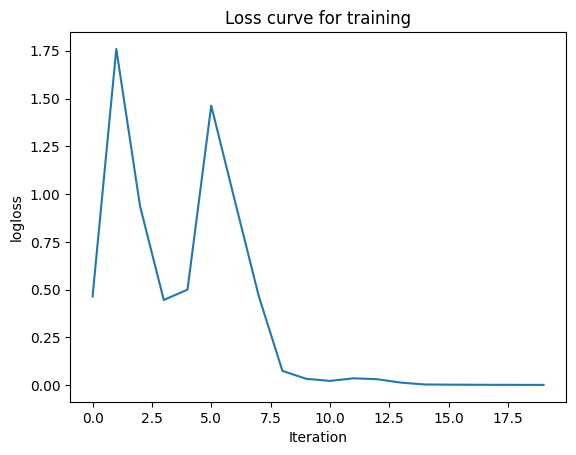

Train accuracy is 99
Test accuracy is 99


In [ ]:
nn = NeuralNet_simple(layers=[8,2,1], learning_rate=0.001, iterations=20) # create the NN model
nn.fit(Xtrain, ytrain) #train the model
nn.plot_loss()

train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))

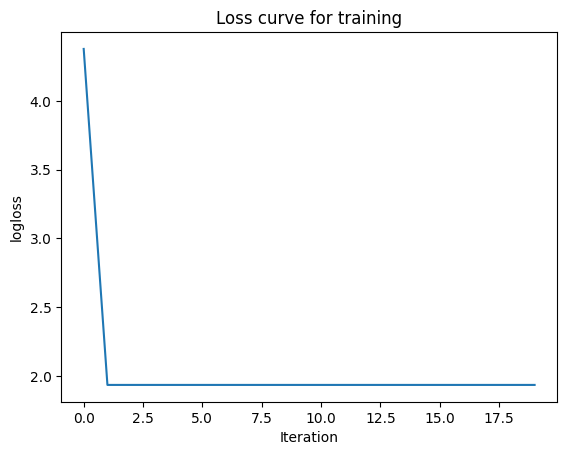

Train accuracy is 91
Test accuracy is 91


In [ ]:
nn = NeuralNet_relu(layers=[8,2,1], learning_rate=0.001, iterations=20, act_2 = 'relu') # create the NN model
nn.fit(Xtrain, ytrain) #train the model
nn.plot_loss()

train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))

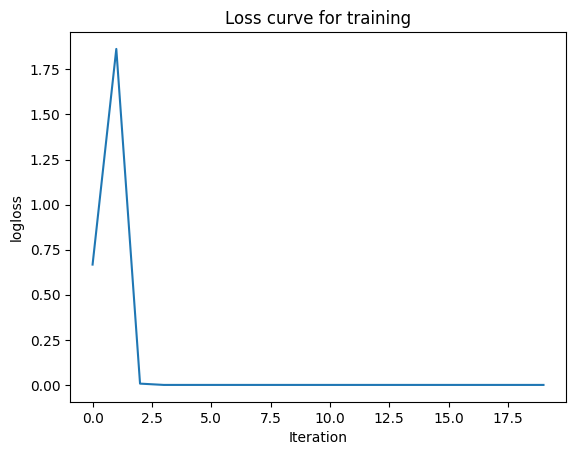

Train accuracy is 100
Test accuracy is 100


In [ ]:
nn = NeuralNet_relu(layers=[8,2,1], learning_rate=0.001, iterations=20) # create the NN model
nn.fit(Xtrain, ytrain) #train the model
nn.plot_loss()

train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))

In this case, the last model, which takes ReLU for the first layer and sigmoid for second, converges fastest amond the three models. Why the second model works bad? There may exists various reasons, but i'll explain one reason.

If the weights are initialized to be large and negative, then

$$
\boldsymbol{a}=\textbf{W}\boldsymbol{x}
$$ 

can take on large negative values, and therefore may $\boldsymbol{z}=\mathrm{ReLU}(a)$ goes to 0. This will cause the gradient for the weights to go to 0. Hence, the ReLU function is not almighty one, and we have to pick activation functions appropriately.

##Optimization Algorithm
We used gradient descent for the optimization algorithm. Since it uses all dataset for updating parameter, there is a lot of computations and hecne it takes a lot of time and memory consumption. It converges stably, but it can easily fall into local minimum. Hence I'll introduce some other optimization algorithms

###Stochastic Gradient Descent - with mini batch
Instead of updates weights using all dataset, **sgd(Stochastic Gradient Descent)** picks n-samples, called **mini-batch**, and uses it to update weights. Assume that whole sample size is N and we pick a sample set $B$ and learning rate $\gamma$. Let a loss function is

$$
\mathcal{L}(\boldsymbol{\theta}) = \frac{1}{N} \sum_{n=1}^{N} l(\boldsymbol{y}_{n}, \boldsymbol{\hat{y}}_{n}) = \frac{1}{N} \sum_{n=1}^{N} \mathcal{L}_{n}(\boldsymbol{\theta})
$$

Then updating formula is as below:

$$
\boldsymbol{\theta}_{t+1}= \boldsymbol{\theta}_{t} - \gamma(\bigtriangledown \mathcal{L}(\boldsymbol{\theta}_t))
\\
= \boldsymbol{\theta}_{t} - \gamma \frac{1}{N} \sum_{n=1}^{N}\bigtriangledown \mathcal{L}_n(\boldsymbol{\theta}_t)
\\
\approx \boldsymbol{\theta}_{t} - \gamma \frac{1}{\left| B \right|}(\sum_{n \in B}\bigtriangledown \mathcal{L}_n(\boldsymbol{\theta}_t)).
$$

As we you may predict, since we use a small mini-batch, it is a quick and noisy approximation compared to gd. And this property will help the model get out of some bad local optima.

####Code for neural networkd using sgd

In [ ]:
class NeuralNet_sgd():
      
  def __init__(self, layers=[8,2,1], learning_rate=0.01, iterations=100, act_1='relu', act_2='sigmoid', optimizer='sgd'):
    self.params = {}
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.loss = []
    self.sample_size = None
    self.layers = layers
    self.X = None
    self.y = None
    try:
      if (act_1 == 'sigmoid'):
        self.act_1 = self.sigmoid
        self.dAct_1 = self.dSigmoid
      elif (act_1 == 'relu'):
        self.act_1 = self.relu
        self.dAct_1 = self.dRelu
      else:
        raise Exception('Please put sigmoid or relu on an activation function')

      if (act_2 == 'sigmoid'):
        self.act_2 = self.sigmoid
        self.dAct_2 = self.dSigmoid
      elif (act_2 == 'relu'):
        self.act_2 = self.relu
        self.dAct_2 = self.dRelu
      else:
        raise Exception('Please put sigmoid or relu on an activation function')
      
      if ((optimizer != 'gd') and (optimizer != 'sgd')):
        raise Exception("Please put sgd or adam on an optimizer")
      self.optimizer = optimizer

    except Exception as e:
      print(e)

  # Initialize the weights
  def init_weights(self):
    np.random.seed(1) # Seed the random number generator
    self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
    self.params['b1']  =np.random.randn(1, self.layers[1])
    self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
    self.params['b2'] = np.random.randn(1, self.layers[2],)

  # for nonzero x
  def eta(self, x):
    ETA = 1e-10
    return np.maximum(x, ETA)

  # sigmoid function
  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))
  
  # derivative of sigmoid function wrt y
  def dSigmoid(self, y):
    return y * (1 - y)

  # relu function wrt x
  def relu(self, x):
    return np.maximum(0, x)

  # derivative of relu function wrt y
  def dRelu(self, y):
    y[y == 0] = 0
    y[y > 0] = 1
    return y

  # loss function
  def entropy_loss(self, y, yhat):
    numb_of_samples = len(y)
    yhat_inv = 1.0 - yhat
    y_inv = 1.0 - y
    loss = -1/numb_of_samples * (
        np.sum(
            np.multiply(np.log(self.eta(yhat)), y) + np.multiply((y_inv), np.log(self.eta(yhat_inv)))
            )
        )
    return loss

  # perform a forward propagation
  def forward_propagation(self):
    
    Z1 = self.X.dot(self.params['W1']) + self.params['b1']
    A1 = self.act_1(Z1)
    Z2 = A1.dot(self.params['W2']) + self.params['b2']
    yhat = self.act_2(Z2)
    loss = self.entropy_loss(self.y,yhat)

    # save calculated values     
    self.params['Z1'] = Z1
    self.params['Z2'] = Z2
    self.params['A1'] = A1

    return yhat,loss

  # perform a barward propagation
  def back_propagation(self,yhat):

    # Computes the derivatives
    y_inv = 1 - self.y
    yhat_inv = 1 - yhat

    dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
    dyhat_wrt_dz2 = self.dAct_2(yhat)
    dl_wrt_z2 = dl_wrt_yhat * dyhat_wrt_dz2

    dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
    dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
    dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

    dA1_wrt_dz1 = self.dAct_1(self.params['A1'])
    dl_wrt_z1 = dl_wrt_A1 * dA1_wrt_dz1
    dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
    dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

    # update parameters using sgd
    self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
    self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
    self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
    self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2

  # Generate random mini-batch
  def generate_mini_batch(self, batch_size):
    indices = np.random.choice(range(self.sample_size), size=batch_size, replace=False)

    mini_batch_X = self.X[indices]
    mini_batch_y = self.y[indices]

    return (mini_batch_X, mini_batch_y)

  # train the model using data and labels 
  def fit(self, X, y, batch_size = 256):
    start = time.time()

    self.loss = []
    self.X = X
    self.y = y
    self.init_weights()

    if (self.optimizer == 'gd'):
      for i in range(self.iterations):
        yhat, loss = self.forward_propagation()
        self.back_propagation(yhat)
        self.loss.append(loss)

    else:
      self.sample_size = X.shape[0]

      for i in range(self.iterations):
        # Generate random mini-batch
        mini_batch_X, mini_batch_y = self.generate_mini_batch(batch_size)
        self.X = mini_batch_X
        self.y = mini_batch_y

        yhat, loss = self.forward_propagation()
        self.back_propagation(yhat)
        self.loss.append(loss)

        self.X = X
        self.y = y
    
    end = time.time()

    print(f"fitting takes {end - start:.5f} sec")
  
    return end - start

  # predict the data with given input
  def predict(self, X):
    Z1 = X.dot(self.params['W1']) + self.params['b1']
    A1 = self.act_1(Z1)
    Z2 = A1.dot(self.params['W2']) + self.params['b2']
    pred = self.act_2(Z2)
    return np.round(pred) 

  # calculate the accuracy of the results compared with given data
  def acc(self, y, yhat):
    acc = int(sum(y == yhat) / len(y) * 100)
    return acc

  # plotting loss
  def plot_loss(self):
    plt.plot(self.loss)
    plt.xlabel("Iteration")
    plt.ylabel("logloss")
    plt.title("Loss curve for training")
    plt.show()  

#### Compare Results
We'll see three models. The first one takes gd as an optimizer, the second one takes sgd with batch size 256.


fitting takes 1.72867 sec
fitting takes 1.70866 sec
fitting takes 1.73238 sec
fitting takes 1.84268 sec
fitting takes 3.03696 sec
fitting takes 1.64264 sec
fitting takes 1.65996 sec
fitting takes 1.64934 sec
fitting takes 1.61210 sec
fitting takes 1.61790 sec
fitting takes 1.62683 sec
fitting takes 3.06834 sec
fitting takes 1.60799 sec
fitting takes 1.62891 sec
fitting takes 1.63016 sec
fitting takes 1.64123 sec
fitting takes 1.64219 sec
fitting takes 1.59520 sec
fitting takes 2.99319 sec
fitting takes 1.76812 sec

average fitting time: 1.8716720700263978 sec
Below is the loss curve and accuracy just for the last fitting


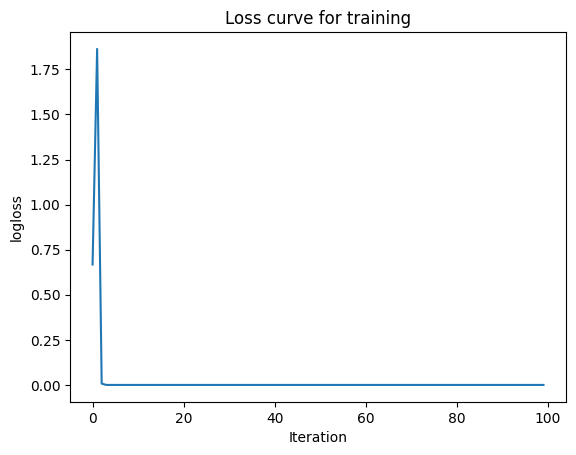

Train accuracy is 100
Test accuracy is 100


In [ ]:
nn = NeuralNet_sgd(layers=[8,2,1], learning_rate=0.001, iterations=100, optimizer = 'gd') # create the NN model

secs = []

for i in range (0, 20):
  secs.append(nn.fit(Xtrain, ytrain))
print(f"\naverage fitting time: {np.mean(secs)} sec")
print(f"Below is the loss curve and accuracy just for the last fitting")

nn.plot_loss()

train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))

fitting takes 0.89051 sec
fitting takes 0.89675 sec
fitting takes 1.10462 sec
fitting takes 1.64724 sec
fitting takes 1.68689 sec
fitting takes 1.64422 sec
fitting takes 0.94241 sec
fitting takes 0.89322 sec
fitting takes 0.89553 sec
fitting takes 0.89271 sec
fitting takes 0.89074 sec
fitting takes 0.88129 sec
fitting takes 0.90907 sec
fitting takes 0.88853 sec
fitting takes 0.90612 sec
fitting takes 0.88549 sec
fitting takes 0.89552 sec
fitting takes 1.41612 sec
fitting takes 1.63161 sec
fitting takes 0.86108 sec

average fitting time: 1.0829845070838928 sec
Below is the loss curve and accuracy just for the last fitting


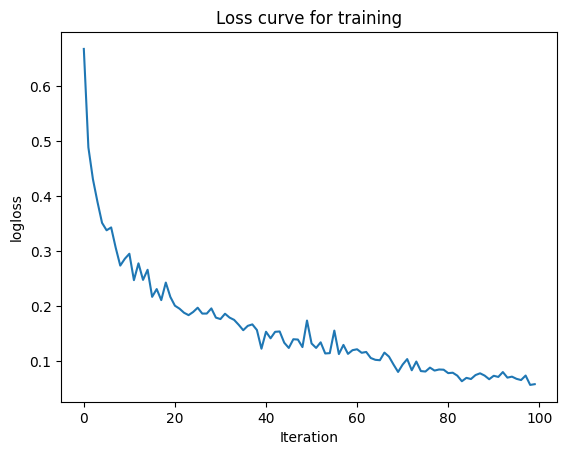

Train accuracy is 99
Test accuracy is 99


In [ ]:
nn = NeuralNet_sgd(layers=[8,2,1], learning_rate=0.001, iterations=100) # create the NN model

secs = []

for i in range (0, 20):
  secs.append(nn.fit(Xtrain, ytrain, batch_size=256))
print(f"\naverage fitting time: {np.mean(secs)} sec")
print(f"Below is the loss curve and accuracy just for the last fitting")

nn.plot_loss()

train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))

In general, sgd takes a smaller time compared with gd, and sgd with large batch is more expensive than the small batch. In summary, small batch is quick, noisy approximation and large batch is more accirate and more expensive algorithm. So we have to choose appropriate batch size.

### Preconditioned SGD
We'll consider **preconditioned SGD**, which involves the following update:

$$
\boldsymbol{\theta}_{t+1}= \boldsymbol{\theta}_{t} - \gamma\textbf{M}_{t}^{-1}\bigtriangledown \mathcal{L}(\boldsymbol{\theta}_t)
$$

where $\textbf{M}_{t}$ is a preconditioning matrix, or simply the preconditioner. Practically, we use a diagonal preconditional.

####AdaGrad
**AdaGrad** involves the following update:

$$
\boldsymbol{\theta}_{t+1}= \boldsymbol{\theta}_{t} - \gamma \frac{1}{\sqrt{\boldsymbol{s}_{t}+\epsilon }}\bigtriangledown \mathcal{L}(\boldsymbol{\theta}_t)
$$

where

$$
\boldsymbol{s}_t = \boldsymbol{s}_{t-1} + \left ( \bigtriangledown \mathcal{L}(\boldsymbol{\theta}_{t}) \right )^{2}
$$

Here, the square in the above equation is element-wise multiplication and $\epsilon>0$ is a small term to avoid dividing by zero. This is an example of an adaptive learning rate. However, the term in the denominator gets larger over time, so the
effective learning rate could drop, and the model may not proceed learning.

####RMSProp
**RMSProp** overcomes the learning rate drop problem of AdaGrad. It use an exponentially weighted moving average of the past squared gradients, rather than their sum. Below is the updating formula:
$$
\boldsymbol{\theta}_{t+1}= \boldsymbol{\theta}_{t} - \gamma \frac{1}{\sqrt{\boldsymbol{s}_{t}+\epsilon }}\bigtriangledown \mathcal{L}(\boldsymbol{\theta}_t)
$$
where
$$
\boldsymbol{s}_t = \beta \boldsymbol{s}_{t-1} + (1-\beta ) \left ( \bigtriangledown \mathcal{L}(\boldsymbol{\theta}_{t}) \right )^{2}
$$
Practically, we usually use $\beta=0.9$, i.e., we usually put more weight on recent examples.

####Adam
Adam is an optimization algorithm combining RMSProp with momentum. It performs the following update:

$$
\boldsymbol{\theta}_{t+1}= \boldsymbol{\theta}_{t} - \gamma \frac{1}{\sqrt{\boldsymbol{s}_{t}+\epsilon }} \boldsymbol{m}_t
$$

where

$$
\boldsymbol{m}_{t}= \beta _{1} \boldsymbol{m}_{t-1}+ (1- \beta_{1}) \bigtriangledown \mathcal{L}(\boldsymbol{\theta}_t)
\\
\boldsymbol{s}_{t}= \beta _{2} \boldsymbol{s}_{t-1}+ (1- \beta_{2}) \bigtriangledown \mathcal{L}(\boldsymbol{\theta}_t)
$$

The standard values for constants are $\beta_{1}=0.9$,  $\beta_{2}=0.999$, and  $\epsilon=10^{-6}$.

When we use initial values $\boldsymbol{m}_{0} = \boldsymbol{s}_{0} = \boldsymbol{0}$, initial estimates will be biased towards small values. Hence, it may better to use the bias-corrected moments:

$$
\boldsymbol{\hat{m}}_{t}= \boldsymbol{m}_{t}/(1-\beta _{1}^{t})
\\
\boldsymbol{\hat{s}}_{t}= \boldsymbol{s}_{t}/(1-\beta _{2}^{t})
$$

####Code for neural networkd using adam

In [ ]:
class NeuralNet():
      
  def __init__(self, layers=[8,2,1], learning_rate=0.01, iterations=100, act_1='relu', act_2='sigmoid', optimizer='adam'):
    self.params = {}
    self.learning_rate = learning_rate
    self.iterations = iterations
    self.loss = []
    self.sample_size = None
    self.layers = layers
    self.X = None
    self.y = None
    try:
      if (act_1 == 'sigmoid'):
        self.act_1 = self.sigmoid
        self.dAct_1 = self.dSigmoid
      elif (act_1 == 'relu'):
        self.act_1 = self.relu
        self.dAct_1 = self.dRelu
      else:
        raise Exception('Please put sigmoid or relu on an activation function')

      if (act_2 == 'sigmoid'):
        self.act_2 = self.sigmoid
        self.dAct_2 = self.dSigmoid
      elif (act_2 == 'relu'):
        self.act_2 = self.relu
        self.dAct_2 = self.dRelu
      else:
        raise Exception('Please put sigmoid or relu on an activation function')
      
      if ((optimizer != 'gd') and (optimizer != 'sgd') and (optimizer != 'adam')):
        raise Exception("Please put sgd or adam on an optimizer")
      self.optimizer = optimizer

    except Exception as e:
      print(e)

  # Initialize the weights
  def init_weights(self):
    np.random.seed(1) # Seed the random number generator
    self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
    self.params['b1']  =np.random.randn(1, self.layers[1])
    self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
    self.params['b2'] = np.random.randn(1, self.layers[2],)
    if (self.optimizer == 'adam'):
      self.params["m_W1"] = np.zeros((self.layers[0], self.layers[1]))
      self.params["s_W1"] = np.zeros((self.layers[0], self.layers[1]))
      self.params["m_b1"] = np.zeros((1, self.layers[1]))
      self.params["s_b1"] = np.zeros((1, self.layers[1]))
      self.params["m_W2"] = np.zeros((self.layers[1], self.layers[2]))
      self.params["s_W2"] = np.zeros((self.layers[1], self.layers[2]))
      self.params["m_b2"] = np.zeros((1, self.layers[2]))
      self.params["s_b2"] = np.zeros((1, self.layers[2]))
      self.params["t"] = 0

  # for nonzero x
  def eta(self, x):
    ETA = 1e-10
    return np.maximum(x, ETA)

  # sigmoid function
  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))
  
  # derivative of sigmoid function wrt y
  def dSigmoid(self, y):
    return y * (1 - y)

  # relu function wrt x
  def relu(self, x):
    return np.maximum(0, x)

  # derivative of relu function wrt y
  def dRelu(self, y):
    y[y == 0] = 0
    y[y > 0] = 1
    return y

  # loss function
  def entropy_loss(self, y, yhat):
    numb_of_samples = len(y)
    yhat_inv = 1.0 - yhat
    y_inv = 1.0 - y
    loss = -1/numb_of_samples * (
        np.sum(
            np.multiply(np.log(self.eta(yhat)), y) + np.multiply((y_inv), np.log(self.eta(yhat_inv)))
            )
        )
    return loss

  # perform a forward propagation
  def forward_propagation(self):
    
    Z1 = self.X.dot(self.params['W1']) + self.params['b1']
    A1 = self.act_1(Z1)
    Z2 = A1.dot(self.params['W2']) + self.params['b2']
    yhat = self.act_2(Z2)
    loss = self.entropy_loss(self.y,yhat)

    # save calculated values     
    self.params['Z1'] = Z1
    self.params['Z2'] = Z2
    self.params['A1'] = A1

    return yhat,loss

  # perform a barward propagation
  def back_propagation(self,yhat):

    # Computes the derivatives
    y_inv = 1 - self.y
    yhat_inv = 1 - yhat

    dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
    dyhat_wrt_dz2 = self.dAct_2(yhat)
    dl_wrt_z2 = dl_wrt_yhat * dyhat_wrt_dz2

    dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
    dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
    dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

    dA1_wrt_dz1 = self.dAct_1(self.params['A1'])
    dl_wrt_z1 = dl_wrt_A1 * dA1_wrt_dz1
    dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
    dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

    # Update parameters
    if (self.optimizer == 'adam'):
      beta1 = 0.9
      beta2 = 0.999
      epsilon = 1e-6
      self.params["t"] += 1

      m_W1 = beta1 * self.params["m_W1"] + (1 - beta1) * dl_wrt_w1
      s_W1 = beta2 * self.params["s_W1"] + (1 - beta2) * (dl_wrt_w1 ** 2)
      m_b1 = beta1 * self.params["m_b1"] + (1 - beta1) * dl_wrt_b1
      s_b1 = beta2 * self.params["s_b1"] + (1 - beta2) * (dl_wrt_b1 ** 2)
      m_W2 = beta1 * self.params["m_W2"] + (1 - beta1) * dl_wrt_w2
      s_W2 = beta2 * self.params["s_W2"] + (1 - beta2) * (dl_wrt_w2 ** 2)
      m_b2 = beta1 * self.params["m_b2"] + (1 - beta1) * dl_wrt_b2
      s_b2 = beta2 * self.params["s_b2"] + (1 - beta2) * (dl_wrt_b2 ** 2)

      m_W1_hat = m_W1 / (1 - (beta1 ** self.params["t"]))
      s_W1_hat = s_W1 / (1 - (beta2 ** self.params["t"]))
      m_b1_hat = m_b1 / (1 - (beta1 ** self.params["t"]))
      s_b1_hat = s_b1 / (1 - (beta2 ** self.params["t"]))
      m_W2_hat = m_W2 / (1 - (beta1 ** self.params["t"]))
      s_W2_hat = s_W2 / (1 - (beta2 ** self.params["t"]))
      m_b2_hat = m_b2 / (1 - (beta1 ** self.params["t"]))
      s_b2_hat = s_b2 / (1 - (beta2 ** self.params["t"]))

      self.params['W1'] -= self.learning_rate * m_W1_hat / (np.sqrt(s_W1_hat + epsilon))
      self.params['b1'] -= self.learning_rate * m_b1_hat / (np.sqrt(s_b1_hat + epsilon))
      self.params['W2'] -= self.learning_rate * m_W2_hat / (np.sqrt(s_W2_hat + epsilon))
      self.params['b2'] -= self.learning_rate * m_b2_hat / (np.sqrt(s_b2_hat + epsilon))

      self.params["m_W1"] = m_W1
      self.params["s_W1"] = s_W1
      self.params["m_b1"] = m_b1
      self.params["s_b1"] = s_b1
      self.params["m_W2"] = m_W2
      self.params["s_W2"] = s_W2
      self.params["m_b2"] = m_b2
      self.params["s_b2"] = s_b2

    else:
      self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
      self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
      self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
      self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2

  # Generate random mini-batch
  def generate_mini_batch(self, batch_size):
    indices = np.random.choice(range(self.sample_size), size=batch_size, replace=False)

    mini_batch_X = self.X[indices]
    mini_batch_y = self.y[indices]

    return (mini_batch_X, mini_batch_y)

  # train the model using data and labels 
  def fit(self, X, y, batch_size = 256):
    start = time.time()

    self.loss = []
    self.X = X
    self.y = y
    self.init_weights()

    if (self.optimizer == 'gd'):
      for i in range(self.iterations):
        yhat, loss = self.forward_propagation()
        self.back_propagation(yhat)
        self.loss.append(loss)

    else:
      self.sample_size = X.shape[0]

      for i in range(self.iterations):
        # Generate random mini-batch
        mini_batch_X, mini_batch_y = self.generate_mini_batch(batch_size)
        self.X = mini_batch_X
        self.y = mini_batch_y

        yhat, loss = self.forward_propagation()
        self.back_propagation(yhat)
        self.loss.append(loss)

        self.X = X
        self.y = y
    
    end = time.time()

    print(f"fitting takes {end - start:.5f} sec")
  
    return end - start

  # predict the data with given input
  def predict(self, X):
    Z1 = X.dot(self.params['W1']) + self.params['b1']
    A1 = self.act_1(Z1)
    Z2 = A1.dot(self.params['W2']) + self.params['b2']
    pred = self.act_2(Z2)
    return np.round(pred) 

  # calculate the accuracy of the results compared with given data
  def acc(self, y, yhat):
    acc = int(sum(y == yhat) / len(y) * 100)
    return acc

  # plotting loss
  def plot_loss(self):
    plt.plot(self.loss)
    plt.xlabel("Iteration")
    plt.ylabel("logloss")
    plt.title("Loss curve for training")
    plt.show()  

#Final Result
So far, we've seen the basic concepts of MLP, arising issues when fitting the model, and appropriate solutions for them. Not just studying concepts, I also  implemented a machine learning model along , with 2 layers, which can do binary classification. In this model, we can choose learning rate, iteration numbers, activation functions (sigmoid, relu), optimizer (gd, sgd, adam), number of neurons in the hidden layer, and size of batchs.

Below code make the model using 2 hidden neurons, with learning rate 0.01, iterating 100 times, using ReLU at first and sigmoid at second layer as activation functions, and taking adam as an optimizer. When fitting data, i take batch size as 256.

fitting takes 0.91083 sec


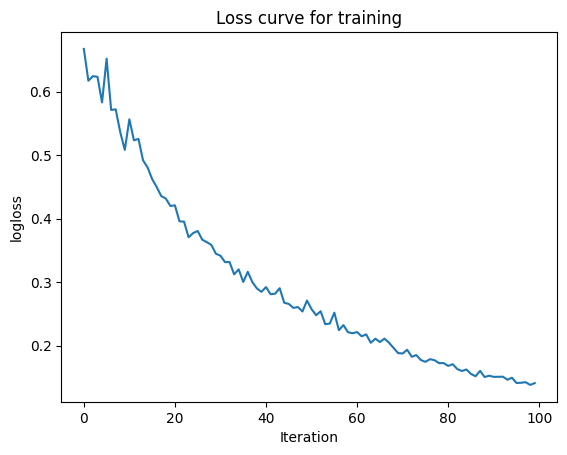

Train accuracy is 100
Test accuracy is 100


In [ ]:
nn = NeuralNet(layers=[8,2,1], learning_rate=0.01, iterations=100) # create the NN model

nn.fit(Xtrain, ytrain, batch_size=256)
nn.plot_loss()

train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))

You can load another data and use this model to do binary classifying!